In [1295]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [1296]:
data = pd.read_csv('test.csv', index_col=0)
df = data.copy()

In [1297]:
df[df['Exterior1st'] == 'ImStucc']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [1298]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Missing Values

In [1299]:
features_with_na = list(df.columns[pd.isna(df).sum()>0])
features_with_na

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [1300]:
#missing values for categorical features

categorical_features_na = [feature for feature in df.columns if (data[feature].dtypes == 'O') and (feature in features_with_na)]
categorical_features_na

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [1301]:
#replacing missing categorical variable values with new 'Missing' label

def replace_na(dataset, features_w_na):
    data = dataset.copy()
    data[features_w_na] = data[features_w_na].fillna('Missing')
    return data

df = replace_na(df,categorical_features_na)

#df[categorical_features_na].isna().sum()

In [1302]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Missing,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1

I am imputing each column based on the actual meaning of NA for that feature. For all remaining NAs, I will drop the row

In [1303]:

#df['Alley'] = df['Alley'].replace('Missing', 'No alley access')

In [1304]:
#imputing NAs in basement categorical features as 'No basement'
#basement_cat_features_na = [feature for feature in categorical_features_na if 'Bsmt' in feature]

#for feature in basement_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No basement')

In [1305]:
#replacing NAs in Garage categorical features with 'No garage'
#garage_cat_features_na = [feature for feature in categorical_features_na if 'Garage' in feature] 

#for feature in garage_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No garage')

In [1306]:
#replaceing Fireplace NAs with'No fireplace'

#df['FireplaceQu'] = df['FireplaceQu'].replace('Missing', 'No fireplace')

In [1307]:
#df[df['FireplaceQu'] == 'No fireplace']

In [1308]:
todrop= ['MasVnrType', 'MasVnrArea', 'Electrical']

data[todrop].isna()

meaningful_nas = [feature for feature in categorical_features_na if feature not in todrop]

for feature in meaningful_nas:
    df[feature]= df[feature].replace('Missing', 'not present')

In [1309]:
#for feature in todrop:
    #df = df.drop(df[df[feature] == 'Missing'].index)

In [1310]:
list(df.columns[pd.isna(df).sum()>0])

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [1311]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,not present,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,not present,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,not present,not present,not present,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,not present,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,not present,not present,not present,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,not present,not present,NaN,not present,0.0,0.0,not present,not present,Y,0,0,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,not present,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,not present,not present,not present,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,Vinyl

### Missing Numerical Values 

In [1312]:
#replacing numerical values
numerical_features_na= [feature for feature in df.columns if (data[feature].dtypes != 'O') and (feature in features_with_na)]
numerical_features_na

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [1313]:
#for feature in numerical_features_na:
    #df[feature+'_na']=np.where(df[feature].isna(),1,0)
#df[df['MasVnrArea'].isna()]
#df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
#df[df['LotFrontage_na'] == 1]


In [1314]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace = True)

In [1315]:
#df_imputed_nums = df
#df=df.drop(['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na'], axis=1)

In [1316]:
#df[df['LotFrontage_na'] == 1]
#df[df['MasVnrArea_na'] == 1]
#df[df['GarageYrBlt_na'] == 1]

In [1317]:
d = list(df.columns[pd.isna(df).sum()>0])

In [1318]:
for feature in d:
    df[feature].fillna(df[feature].median(),inplace = True)

In [1319]:
sum(df.isna().sum())

0

In [1320]:
#drop_rows = list(df[df.isna().sum(axis=1)>0].index)
#drop_rows

In [1321]:
#df = df.drop(drop_rows, axis=0)

## Feature Engineering

#### Dealing with Ordinal Features

In [1322]:
condition_features = ['ExterCond', 'BsmtCond','GarageCond', 'HeatingQC']
qual_features = ['ExterQual','BsmtQual', 'KitchenQual','GarageQual','FireplaceQu']

In [1323]:
#changing "condition" features to ordinal numerical 

cleanup= {'Ex': 5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1,'not present':0}
for feature in condition_features:
    df[feature] = df[feature].apply(lambda x: cleanup[x])

In [1324]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,3,CBlock,TA,3,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,not present,Attchd,1961.0,Unf,1.0,730.0,TA,3,Y,140,0,0,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,3,CBlock,TA,3,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,3,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,not present,Attchd,1958.0,Unf,1.0,312.0,TA,3,Y,393,36,0,0,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,3,PConc,Gd,3,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,4,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,3,Y,212,34,0,0,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,3,PConc,TA,3,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,5,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,3,Y,360,36,0,0,0,0,not present,not present,not present,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,3,PConc,Gd,3,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,5,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,not present,Attchd,1992.0,RFn,2.0,506.0,TA,3,Y,0,82,0,0,144,0,not present,not present,not present,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,3,CBlock,TA,3,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,4,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,not present,not present,1979.0,not present,0.0,0.0,not present,0,Y,0,0,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,3,CBlock,TA,3,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,3,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,not present,CarPort,1970.0,Unf,1.0,286.0,TA,3,Y,0,24,0,0,0,0,not present,not present,not present,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,3,CBlock,TA

In [1325]:
#changing "quality" features to ordinal numerical 

for feature in qual_features:
    df[feature]=df[feature].apply(lambda x: cleanup[x])

In [1326]:
# Basement Ordinals

bsmt_expo_clean = {'Gd':4,'Av':3,'Mn':2,'No':1,'not present':0}

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: bsmt_expo_clean[x])


#Basement Finish type to numeric

bsmt_finish_types = ['BsmtFinType1','BsmtFinType2']

bsmt_finish_clean = {'GLQ': 6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'not present':0}

for feature in bsmt_finish_types:
    df[feature]=df[feature].apply(lambda x: bsmt_finish_clean[x])


# Garage Finish ordinals

garage_finish_clean = {'Fin':3,'RFn':2,'Unf':1,'not present':0}

df['GarageFinish']=df['GarageFinish'].apply(lambda x: garage_finish_clean[x])

#### Combining SF to get Total SF

In [1327]:
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea'] + df['GarageArea']

In [1328]:
df=df.drop(['BsmtUnfSF','1stFlrSF','2ndFlrSF','TotalBsmtSF'], axis=1)

In [1329]:
#dropping the other Basement SF columns and keeping Total Basement SF
df['TotalFinishedBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df=df.drop(['BsmtFinSF1','BsmtFinSF2'], axis=1)

In [1330]:
#Creating a TotalBaths column and dropping the specific bathroom columns
df['TotalBath']=df['BsmtFullBath'] + df['FullBath'] + (.5* df['BsmtHalfBath']) + (.5* df['HalfBath'])
df=df.drop(['BsmtFullBath','FullBath','BsmtHalfBath', 'HalfBath'], axis=1)

In [1331]:
#Creating TotalPorch column and dropping individual porch columns
df['OutdoorFeatureSF']= df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF'] + df['OpenPorchSF']
df=df.drop(['3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF','OpenPorchSF'], axis=1)


In [1332]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,3,2,GasA,3,Y,SBrkr,0,896,2,1,3,5,Typ,0,0,Attchd,1961.0,1,1.0,730.0,3,3,Y,0,not present,MnPrv,not present,0,6,2010,WD,Normal,2508.0,612.0,1.0,260
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,1,5,1,GasA,3,Y,SBrkr,0,1329,3,1,4,6,Typ,0,0,Attchd,1958.0,1,1.0,312.0,3,3,Y,0,not present,not present,Gar2,12500,6,2010,WD,Normal,2970.0,923.0,1.5,429
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,1,GasA,4,Y,SBrkr,0,1629,3,1,3,6,Typ,1,3,Attchd,1997.0,3,2.0,482.0,3,3,Y,0,not present,MnPrv,not present,0,3,2010,WD,Normal,3039.0,791.0,2.5,246
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,1,6,1,GasA,5,Y,SBrkr,0,1604,3,1,4,7,Typ,1,4,Attchd,1998.0,3,2.0,470.0,3,3,Y,0,not present,not present,not present,0,6,2010,WD,Normal,3000.0,602.0,2.5,396
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,1,GasA,5,Y,SBrkr,0,1280,2,1,4,5,Typ,0,0,Attchd,1992.0,2,2.0,506.0,3,3,Y,0,not present,not present,not present,0,1,2010,WD,Normal,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,1,GasA,4,Y,SBrkr,0,1092,3,1,3,5,Typ,0,0,not present,1979.0,0,0.0,0.0,0,0,Y,0,not present,not present,not present,0,6,2006,WD,Normal,1638.0,0.0,1.5,0
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,3,1,GasA,3,Y,SBrkr,0,1092,3,1,3,6,Typ,0,0,CarPort,1970.0,1,1.0,286.0,3,3,Y,0,not present,not present,not present,0,4,2006,WD,Abnorml,1924.0,252.0,1.5,24
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,5,1,GasA,5,Y,SBrkr,0,1224,4,1,3,7,Typ,1,3,Detchd,1960.0,1,2.0,576.0,3,3,Y,0,not present,not present,not present,0,9,2006,WD,Abnorml,3024.0,1224.0,2.0,474


## Engineering Year Variables

In [1333]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

In [1334]:
for feature in year_features[0:3]:
    df[feature] = df['YrSold'] - df[feature]

In [1335]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,3,2,GasA,3,Y,SBrkr,0,896,2,1,3,5,Typ,0,0,Attchd,49.0,1,1.0,730.0,3,3,Y,0,not present,MnPrv,not present,0,6,2010,WD,Normal,2508.0,612.0,1.0,260
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,1,5,1,GasA,3,Y,SBrkr,0,1329,3,1,4,6,Typ,0,0,Attchd,52.0,1,1.0,312.0,3,3,Y,0,not present,not present,Gar2,12500,6,2010,WD,Normal,2970.0,923.0,1.5,429
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,1,GasA,4,Y,SBrkr,0,1629,3,1,3,6,Typ,1,3,Attchd,13.0,3,2.0,482.0,3,3,Y,0,not present,MnPrv,not present,0,3,2010,WD,Normal,3039.0,791.0,2.5,246
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,1,6,1,GasA,5,Y,SBrkr,0,1604,3,1,4,7,Typ,1,4,Attchd,12.0,3,2.0,470.0,3,3,Y,0,not present,not present,not present,0,6,2010,WD,Normal,3000.0,602.0,2.5,396
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,1,GasA,5,Y,SBrkr,0,1280,2,1,4,5,Typ,0,0,Attchd,18.0,2,2.0,506.0,3,3,Y,0,not present,not present,not present,0,1,2010,WD,Normal,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,1,GasA,4,Y,SBrkr,0,1092,3,1,3,5,Typ,0,0,not present,27.0,0,0.0,0.0,0,0,Y,0,not present,not present,not present,0,6,2006,WD,Normal,1638.0,0.0,1.5,0
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,3,1,GasA,3,Y,SBrkr,0,1092,3,1,3,6,Typ,0,0,CarPort,36.0,1,1.0,286.0,3,3,Y,0,not present,not present,not present,0,4,2006,WD,Abnorml,1924.0,252.0,1.5,24
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,5,1,GasA,5,Y,SBrkr,0,1224,4,1,3,7,Typ,1,3,Detchd,46.0,1,2.0,576.0,3,3,Y,0,not present,not present,not present,0,9,2006,WD,Abnorml,3024.0,1224.0,2.0,474


#### Outliers

In [1336]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'MoSold',
 'TotalBath']

In [1337]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Id'] and feature not in year_features]
continuous_features


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'GrLivArea',
 'GarageArea',
 'MiscVal',
 'TotalSF',
 'TotalFinishedBsmt',
 'OutdoorFeatureSF']

In [1338]:
#for feature in continuous_features:
    #data=df.copy()
    #data[feature] = data[feature]
    #plt.scatter(data[feature], data['SalePrice'])
    #plt.xlabel(feature)
    #plt.show()

In [1339]:
#Dropping Outliers
#for feature in continuous_features:
    #mean = df[feature].mean()
    #std = df[feature].std()
    #upper = mean + (3*std)
    #lower = mean - (3*std)
    #test = df[(df[feature]<upper) & (df[feature]>lower)]
    
    
#(df[feature]<upper) & test
#df = test
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,3,2,GasA,3,Y,SBrkr,0,896,2,1,3,5,Typ,0,0,Attchd,49.0,1,1.0,730.0,3,3,Y,0,not present,MnPrv,not present,0,6,2010,WD,Normal,2508.0,612.0,1.0,260
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,1,5,1,GasA,3,Y,SBrkr,0,1329,3,1,4,6,Typ,0,0,Attchd,52.0,1,1.0,312.0,3,3,Y,0,not present,not present,Gar2,12500,6,2010,WD,Normal,2970.0,923.0,1.5,429
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,1,GasA,4,Y,SBrkr,0,1629,3,1,3,6,Typ,1,3,Attchd,13.0,3,2.0,482.0,3,3,Y,0,not present,MnPrv,not present,0,3,2010,WD,Normal,3039.0,791.0,2.5,246
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,1,6,1,GasA,5,Y,SBrkr,0,1604,3,1,4,7,Typ,1,4,Attchd,12.0,3,2.0,470.0,3,3,Y,0,not present,not present,not present,0,6,2010,WD,Normal,3000.0,602.0,2.5,396
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,1,GasA,5,Y,SBrkr,0,1280,2,1,4,5,Typ,0,0,Attchd,18.0,2,2.0,506.0,3,3,Y,0,not present,not present,not present,0,1,2010,WD,Normal,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,1,GasA,4,Y,SBrkr,0,1092,3,1,3,5,Typ,0,0,not present,27.0,0,0.0,0.0,0,0,Y,0,not present,not present,not present,0,6,2006,WD,Normal,1638.0,0.0,1.5,0
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,3,1,GasA,3,Y,SBrkr,0,1092,3,1,3,6,Typ,0,0,CarPort,36.0,1,1.0,286.0,3,3,Y,0,not present,not present,not present,0,4,2006,WD,Abnorml,1924.0,252.0,1.5,24
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,5,1,GasA,5,Y,SBrkr,0,1224,4,1,3,7,Typ,1,3,Detchd,46.0,1,2.0,576.0,3,3,Y,0,not present,not present,not present,0,9,2006,WD,Abnorml,3024.0,1224.0,2.0,474


### Checking for Dominant Categorical Features

In [1340]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [1341]:
dom_check=[]
for feature in categorical_features:
    percent = df[feature].value_counts()[0]/len(df)
    dom_check.append(percent)

In [1342]:
categorical_percent = pd.DataFrame(list(zip(categorical_features, dom_check)))
categorical_percent.columns = ['Feature', 'Top Feature Percentage']
list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])
categorical_percent=categorical_percent.sort_values('Top Feature Percentage')
categorical_percent

,Feature,Top Feature Percentage
8,Neighborhood,0.149417
16,Exterior2nd,0.349554
15,Exterior1st,0.349554
18,Foundation,0.453050
12,HouseStyle,0.510624
23,GarageType,0.584647
17,MasVnrType,0.601782
3,LotShape,0.640164
6,LotConfig,0.740918
0,MSZoning,0.763537


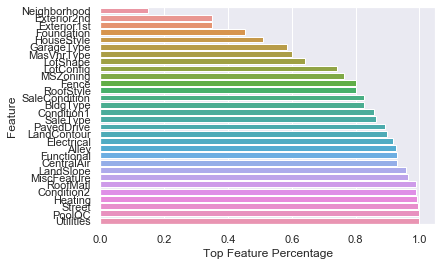

In [1343]:
import seaborn as sns

sns.barplot(x='Top Feature Percentage', y ='Feature', data=categorical_percent)
sns.set(rc={'figure.figsize':(12,12)})

In [1344]:
drop_cat = list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])

df_copy = df

df_copy= df_copy.drop(drop_cat, axis=1)
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,Reg,NAmes,1Story,5,6,49,49,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,3,2,3,0,896,2,1,3,5,0,0,Attchd,49.0,1,1.0,730.0,3,3,0,0,6,2010,2508.0,612.0,1.0,260
1462,20,81.0,14267,IR1,NAmes,1Story,6,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,1,5,1,3,0,1329,3,1,4,6,0,0,Attchd,52.0,1,1.0,312.0,3,3,0,12500,6,2010,2970.0,923.0,1.5,429
1463,60,74.0,13830,IR1,Gilbert,2Story,5,5,13,12,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,1,4,0,1629,3,1,3,6,1,3,Attchd,13.0,3,2.0,482.0,3,3,0,0,3,2010,3039.0,791.0,2.5,246
1464,60,78.0,9978,IR1,Gilbert,2Story,6,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,1,6,1,5,0,1604,3,1,4,7,1,4,Attchd,12.0,3,2.0,470.0,3,3,0,0,6,2010,3000.0,602.0,2.5,396
1465,120,43.0,5005,IR1,StoneBr,1Story,8,5,18,18,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,1,5,0,1280,2,1,4,5,0,0,Attchd,18.0,2,2.0,506.0,3,3,0,0,1,2010,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Reg,MeadowV,2Story,4,7,36,36,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,1,4,0,1092,3,1,3,5,0,0,not present,27.0,0,0.0,0.0,0,0,0,0,6,2006,1638.0,0.0,1.5,0
2916,160,21.0,1894,Reg,MeadowV,2Story,4,5,36,36,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,3,1,3,0,1092,3,1,3,6,0,0,CarPort,36.0,1,1.0,286.0,3,3,0,0,4,2006,1924.0,252.0,1.5,24
2917,20,160.0,20000,Reg,Mitchel,1Story,5,7,46,10,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,5,1,5,0,1224,4,1,3,7,1,3,Detchd,46.0,1,2.0,576.0,3,3,0,0,9,2006,3024.0,1224.0,2.0,474


### Checking Dominant Discrete Features

In [1345]:
discrete_features = [feature for feature in numerical_features if (len(df[feature].unique()) < 30) and (feature not in year_features+['Id'])]

discrete_features


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [1346]:
for feature in discrete_features:
    print(df[feature].value_counts())

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64
3    892
4    491
5     55
2     21
Name: ExterQual, dtype: int64
3    1256
4     153
2      39
5       9
1       2
Name: ExterCond, dtype: int64
3    634
4    591
5    137
2     53
0     44
Name: BsmtQual, dtype: int64
3    1295
2      59
4      57
0      45
1       3
Name: BsmtCond, dtype: int64
1    951
3    197
4    142
2    125
0     44
Name: BsmtExposure, dtype: int64
6    431
1    421
5    209
3    155
4    121
2     80
0     42
Name: BsmtFinType1, dtype: int64
1    1237
3      51
0      42
2      41
4      35
5      33
6      20
Name:

In [1347]:
ls=[]
for feature in discrete_features:
    x = list(df[feature].value_counts())[0]/len(df)
    ls.append(x)
   
discrete_percent = pd.DataFrame(list(zip(discrete_features,ls)))
discrete_percent.columns= ['Feature', 'Top Feature Percentage']
discrete_percent = discrete_percent.sort_values('Top Feature Percentage')
discrete_percent

,Feature,Top Feature Percentage
24,MoSold,0.171350
1,OverallQual,0.293352
8,BsmtFinType1,0.295408
15,TotRmsAbvGrd,0.302947
25,TotalBath,0.305689
0,MSSubClass,0.372173
18,GarageFinish,0.428376
5,BsmtQual,0.434544
17,FireplaceQu,0.500343
16,Fireplaces,0.500343


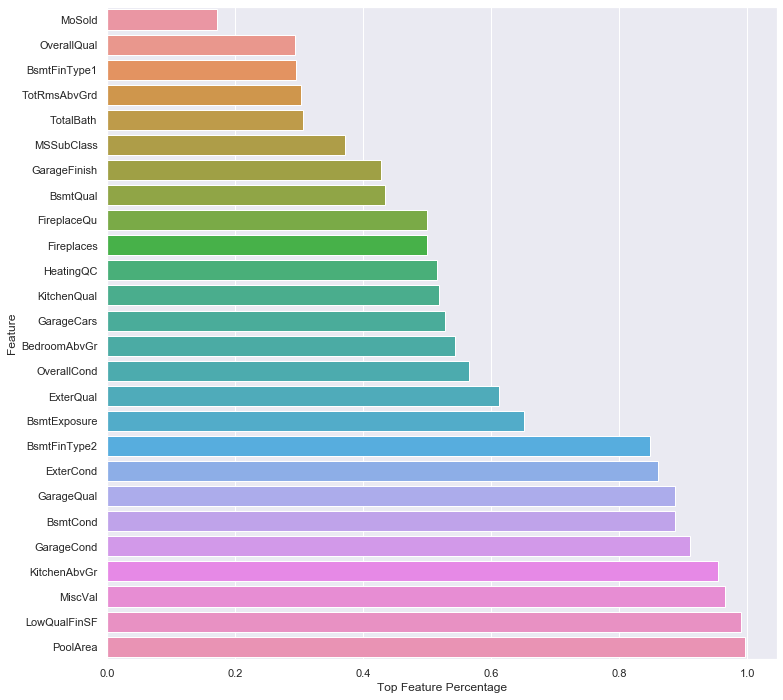

In [1348]:
sns.barplot(x='Top Feature Percentage', y ='Feature', data=discrete_percent)
sns.set(rc={'figure.figsize':(6,6)})

In [1349]:
#filtering out discrete variables that have one feature accounting for over 70% percent of observations

drop_discrete = list(discrete_percent[discrete_percent['Top Feature Percentage']>.7]['Feature'])

In [1350]:
df_copy = df_copy.drop(drop_discrete, axis=1)

In [1351]:
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,Reg,NAmes,1Story,5,6,49,49,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,3,3,896,2,3,5,0,0,Attchd,49.0,1,1.0,730.0,6,2010,2508.0,612.0,1.0,260
1462,20,81.0,14267,IR1,NAmes,1Story,6,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,1,5,3,1329,3,4,6,0,0,Attchd,52.0,1,1.0,312.0,6,2010,2970.0,923.0,1.5,429
1463,60,74.0,13830,IR1,Gilbert,2Story,5,5,13,12,VinylSd,VinylSd,None,0.0,3,PConc,4,1,6,4,1629,3,3,6,1,3,Attchd,13.0,3,2.0,482.0,3,2010,3039.0,791.0,2.5,246
1464,60,78.0,9978,IR1,Gilbert,2Story,6,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,1,6,5,1604,3,4,7,1,4,Attchd,12.0,3,2.0,470.0,6,2010,3000.0,602.0,2.5,396
1465,120,43.0,5005,IR1,StoneBr,1Story,8,5,18,18,HdBoard,HdBoard,None,0.0,4,PConc,4,1,5,5,1280,2,4,5,0,0,Attchd,18.0,2,2.0,506.0,1,2010,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Reg,MeadowV,2Story,4,7,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,1,4,1092,3,3,5,0,0,not present,27.0,0,0.0,0.0,6,2006,1638.0,0.0,1.5,0
2916,160,21.0,1894,Reg,MeadowV,2Story,4,5,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,3,3,1092,3,3,6,0,0,CarPort,36.0,1,1.0,286.0,4,2006,1924.0,252.0,1.5,24
2917,20,160.0,20000,Reg,Mitchel,1Story,5,7,46,10,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,5,5,1224,4,3,7,1,3,Detchd,46.0,1,2.0,576.0,9,2006,3024.0,1224.0,2.0,474


### Removing Variables with Multicolinearity

#### Removing Features that are not correlated to Sale Price

In [1352]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]


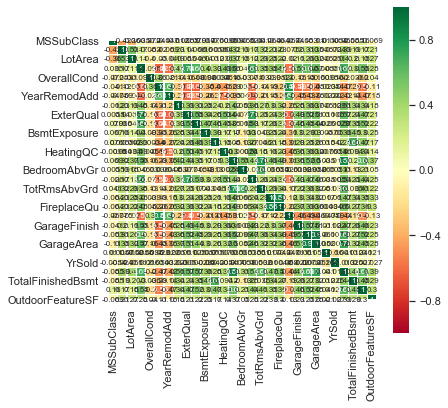

In [1353]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [1354]:
#low_salecorr_drop = list(golden_corr[abs(golden_corr['SalePrice'])<.2]['SalePrice'].index)
low_salecorr_drop=['MSSubClass','OverallCond','BedroomAbvGr','MoSold','YrSold']
df_copy = df_copy.drop(low_salecorr_drop, axis =1)


In [1355]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,3,3,896,3,5,0,0,Attchd,49.0,1,1.0,730.0,2508.0,612.0,1.0,260
1462,81.0,14267,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,1,5,3,1329,4,6,0,0,Attchd,52.0,1,1.0,312.0,2970.0,923.0,1.5,429
1463,74.0,13830,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.0,3,PConc,4,1,6,4,1629,3,6,1,3,Attchd,13.0,3,2.0,482.0,3039.0,791.0,2.5,246
1464,78.0,9978,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,1,6,5,1604,4,7,1,4,Attchd,12.0,3,2.0,470.0,3000.0,602.0,2.5,396
1465,43.0,5005,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.0,4,PConc,4,1,5,5,1280,4,5,0,0,Attchd,18.0,2,2.0,506.0,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,1,4,1092,3,5,0,0,not present,27.0,0,0.0,0.0,1638.0,0.0,1.5,0
2916,21.0,1894,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,3,3,1092,3,6,0,0,CarPort,36.0,1,1.0,286.0,1924.0,252.0,1.5,24
2917,160.0,20000,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,5,5,1224,3,7,1,3,Detchd,46.0,1,2.0,576.0,3024.0,1224.0,2.0,474


In [1356]:
low_salecorr_drop

['MSSubClass', 'OverallCond', 'BedroomAbvGr', 'MoSold', 'YrSold']

#### Removing Features that are highly correlated to one another

In [1357]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]

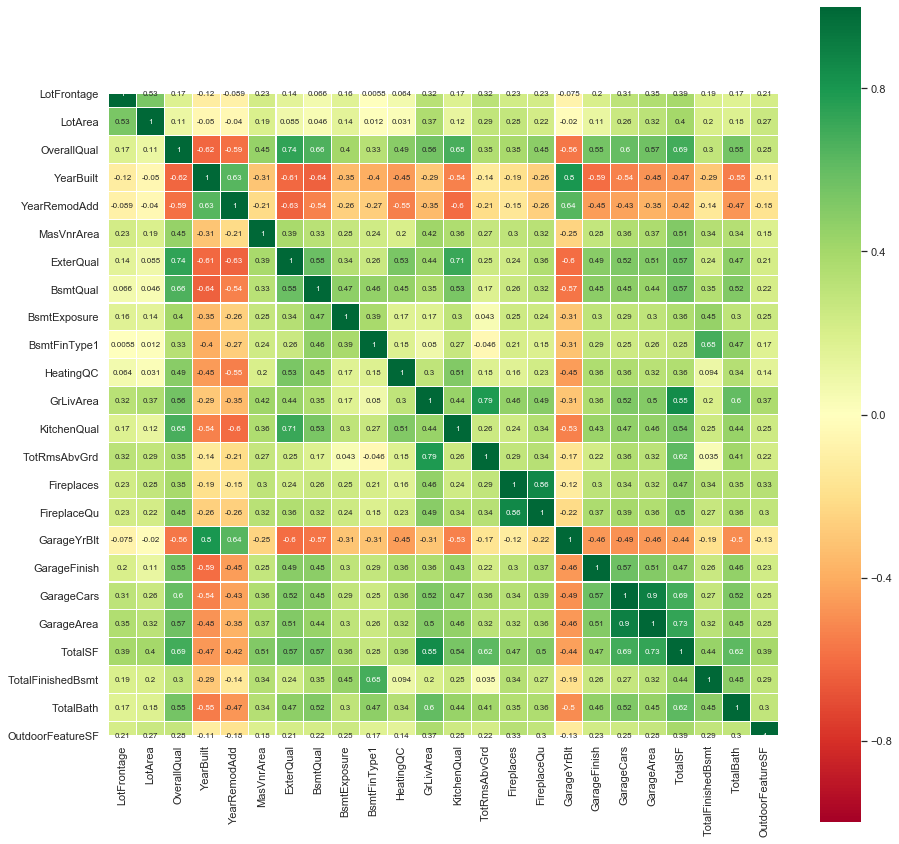

In [1358]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [1359]:
#Calulating VIF to test if there is multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

test = calc_vif(df_copy[numerical_features_copy])
test[test['VIF']<10]
test

In [1360]:
t = df_copy.copy()
t['LotArea'].describe()

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64

In [1361]:
stats.boxcox(t['LotArea'], lmbda=0.08535789215442165)

array([14.33176646, 14.79167167, 14.72137818, ..., 15.56705939,
       14.09460193, 13.91639836])

In [1362]:
lmda = [0.5252183097803825,
0.08535789215442165,
-0.2414941744101274,
0.4709822806972006,
0.8183162873432392,
0.02293986760371175,
-0.12811877648382855,
0.08866691316812471,
0.8155754504419407,
-0.07710305486277903,
0.008798063038343512,
0.24603920090562464]



### Box Cox Transformation for Continuous Numercial Features

In [1363]:
from scipy import stats
i = [feature for feature in continuous_features if (feature in df_copy.columns)] #and (feature != 'SalePrice')]
test = df_copy.copy()
test[i]

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,TotalSF,TotalFinishedBsmt,OutdoorFeatureSF
Id,,,,,,,,
1461,80.0,11622,0.0,896,730.0,2508.0,612.0,260
1462,81.0,14267,108.0,1329,312.0,2970.0,923.0,429
1463,74.0,13830,0.0,1629,482.0,3039.0,791.0,246
1464,78.0,9978,20.0,1604,470.0,3000.0,602.0,396
1465,43.0,5005,0.0,1280,506.0,3066.0,263.0,226
...,...,...,...,...,...,...,...,...
2915,21.0,1936,0.0,1092,0.0,1638.0,0.0,0
2916,21.0,1894,0.0,1092,286.0,1924.0,252.0,24
2917,160.0,20000,0.0,1224,576.0,3024.0,1224.0,474


In [1364]:
lmda = [0.5216756646610037,
 0.09147158120026055,
 -0.24693084552734856,
 0.8141238907461489,
 0.08302449936821887,
 0.8126284179113649,
 0.41650808339439255,
 0.2431131007504636,
 0.4618438941249611]
# for f in i:
#     transformed= (stats.boxcox(test[f]+1, lmbda=lmda[i.index(f)]))
#     test[f]=transformed
#     #print(transformed)
    
    
# #pd.DataFrame(transformed)
# df_copy = test

In [1365]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,3,3,896,3,5,0,0,Attchd,49.0,1,1.0,730.0,2508.0,612.0,1.0,260
1462,81.0,14267,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,1,5,3,1329,4,6,0,0,Attchd,52.0,1,1.0,312.0,2970.0,923.0,1.5,429
1463,74.0,13830,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.0,3,PConc,4,1,6,4,1629,3,6,1,3,Attchd,13.0,3,2.0,482.0,3039.0,791.0,2.5,246
1464,78.0,9978,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,1,6,5,1604,4,7,1,4,Attchd,12.0,3,2.0,470.0,3000.0,602.0,2.5,396
1465,43.0,5005,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.0,4,PConc,4,1,5,5,1280,4,5,0,0,Attchd,18.0,2,2.0,506.0,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,1,4,1092,3,5,0,0,not present,27.0,0,0.0,0.0,1638.0,0.0,1.5,0
2916,21.0,1894,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,3,3,1092,3,6,0,0,CarPort,36.0,1,1.0,286.0,1924.0,252.0,1.5,24
2917,160.0,20000,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,5,5,1224,3,7,1,3,Detchd,46.0,1,2.0,576.0,3024.0,1224.0,2.0,474


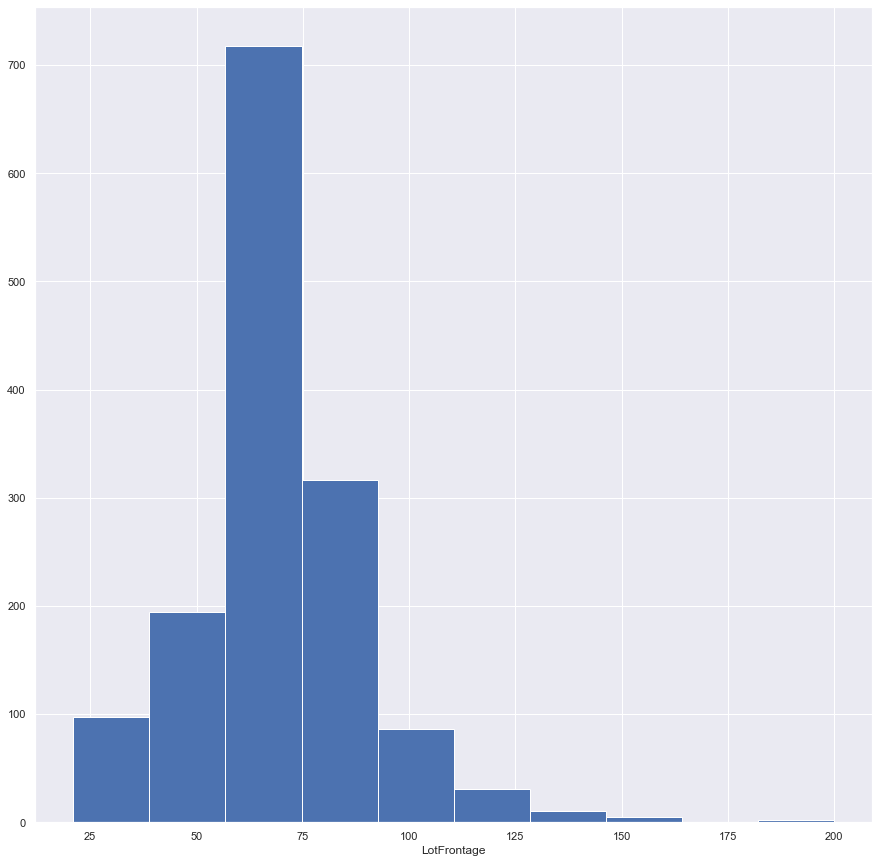

<Figure size 360x360 with 0 Axes>

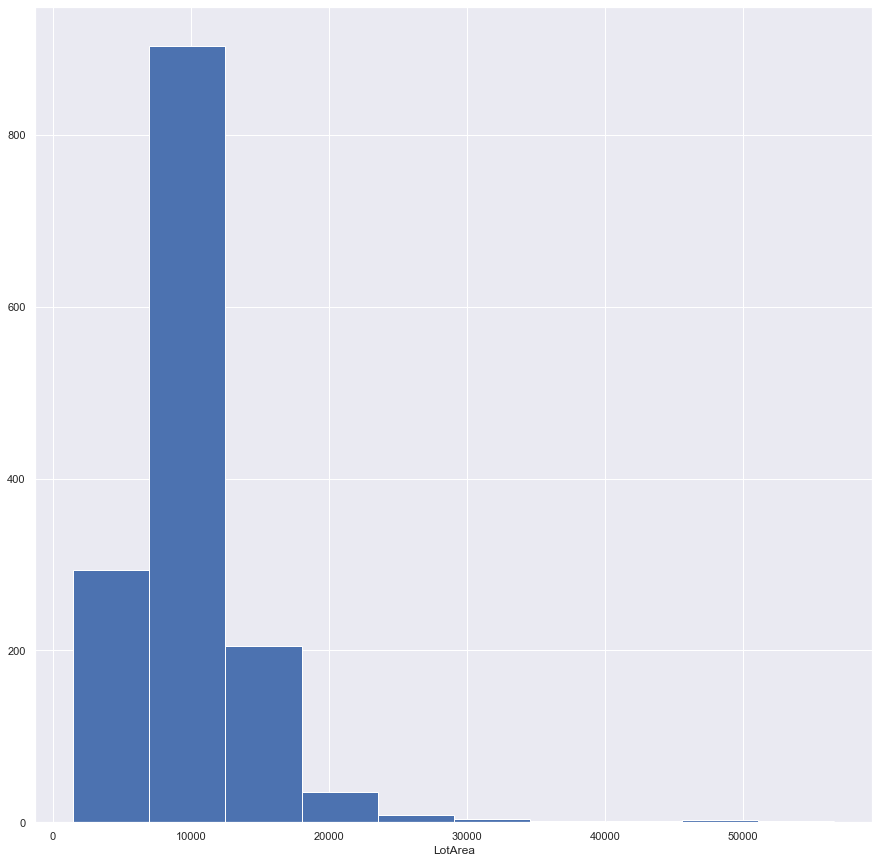

<Figure size 360x360 with 0 Axes>

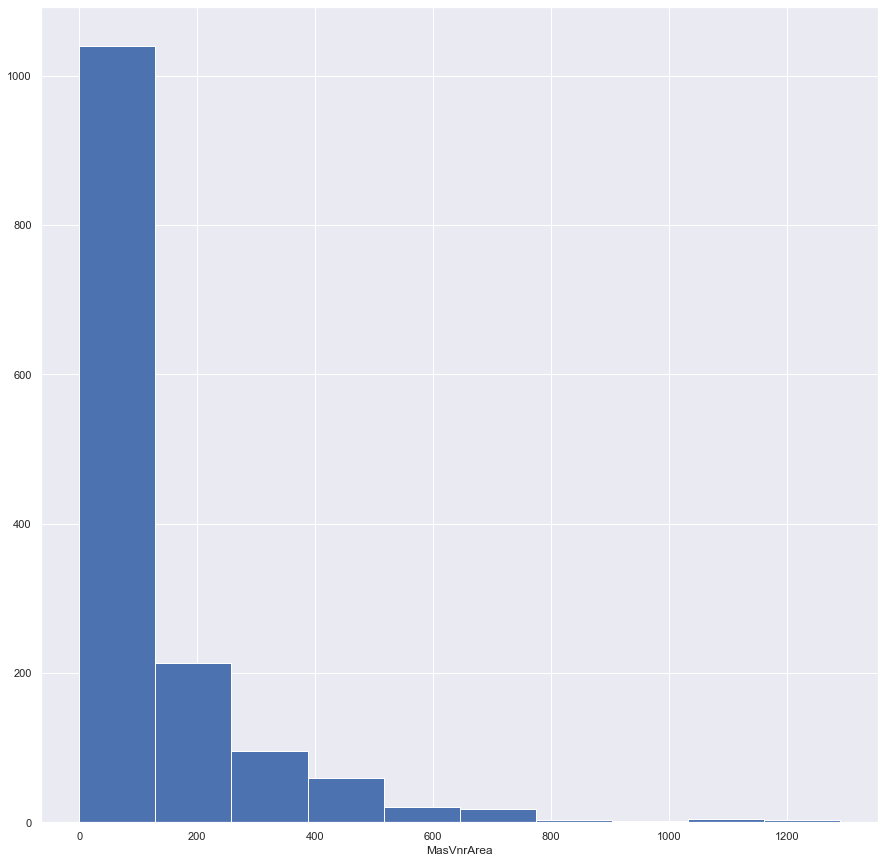

<Figure size 360x360 with 0 Axes>

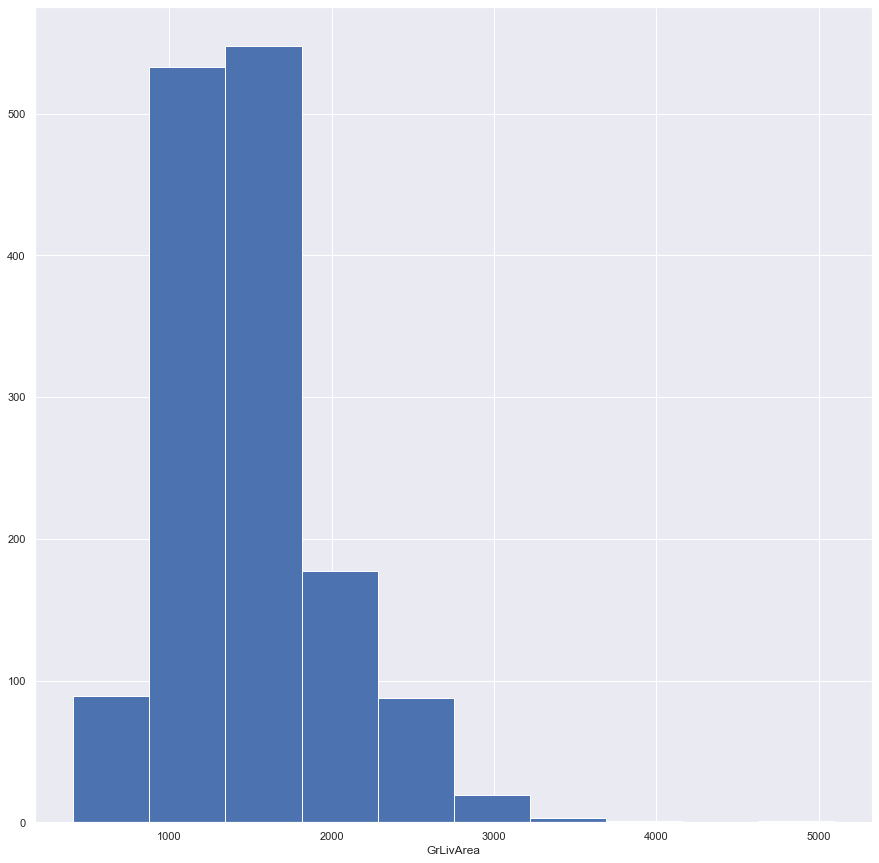

<Figure size 360x360 with 0 Axes>

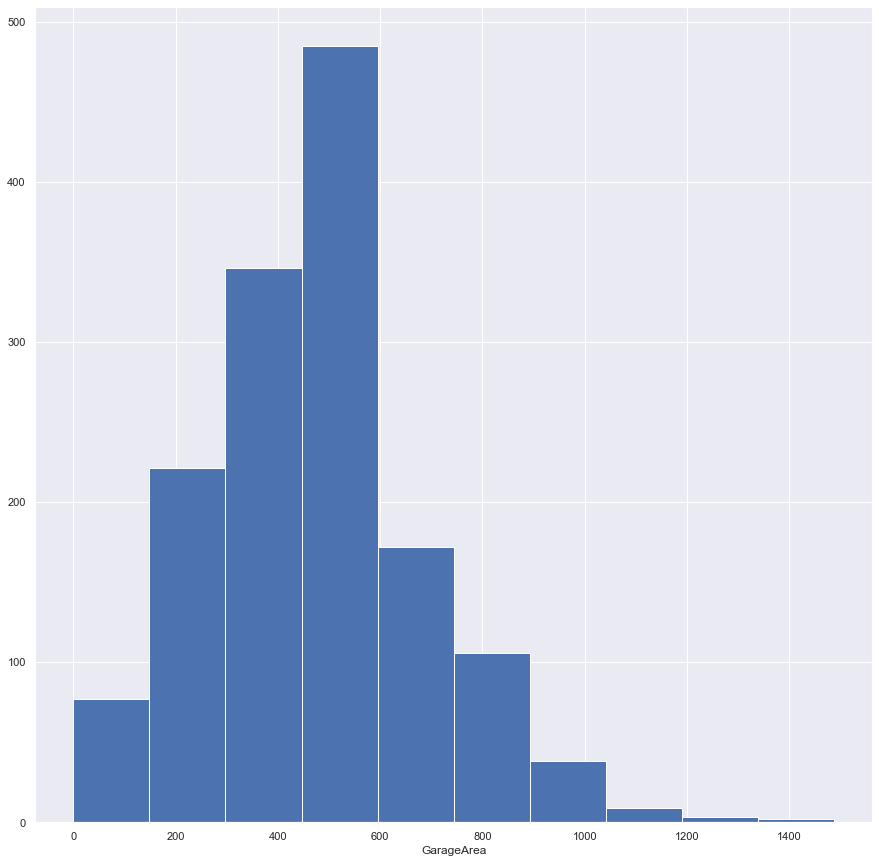

<Figure size 360x360 with 0 Axes>

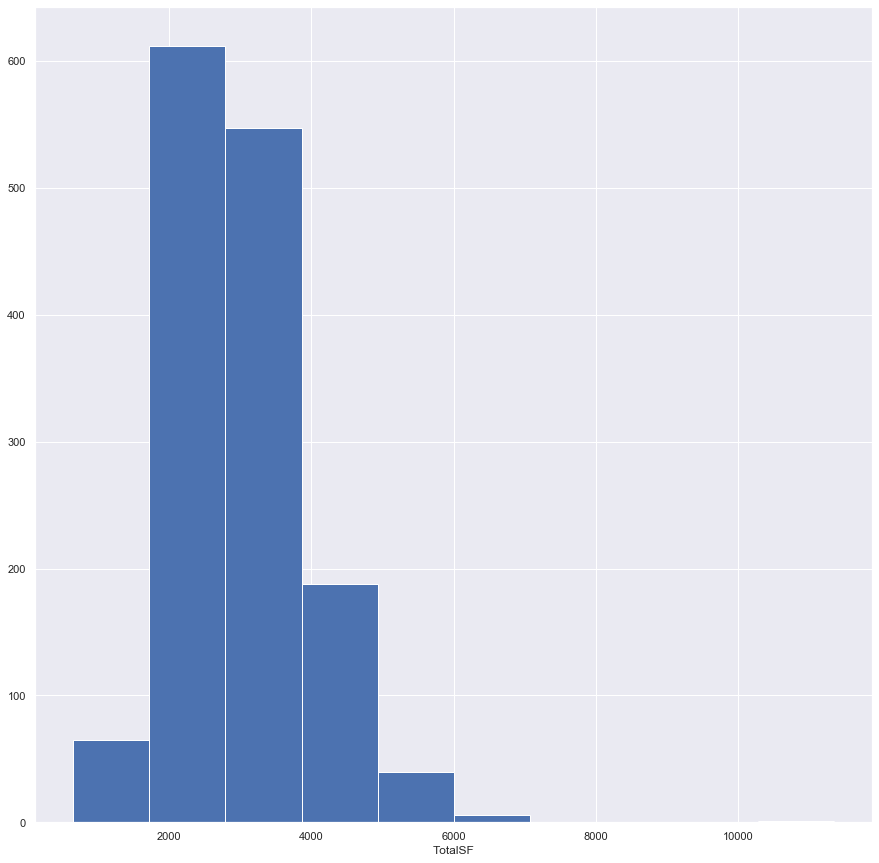

<Figure size 360x360 with 0 Axes>

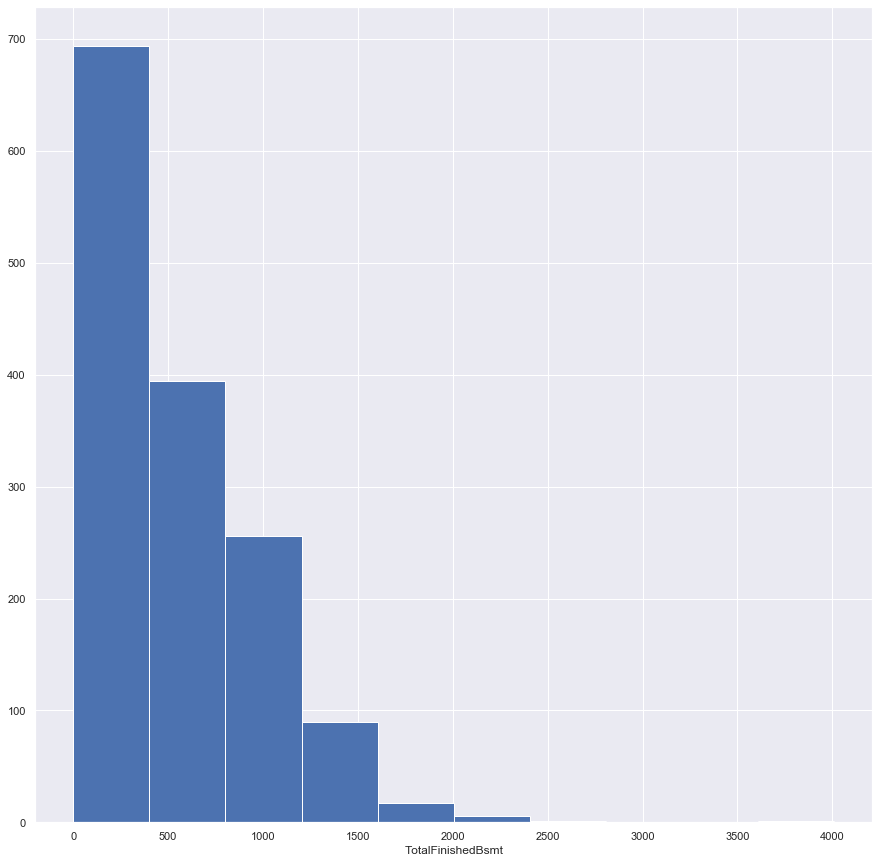

<Figure size 360x360 with 0 Axes>

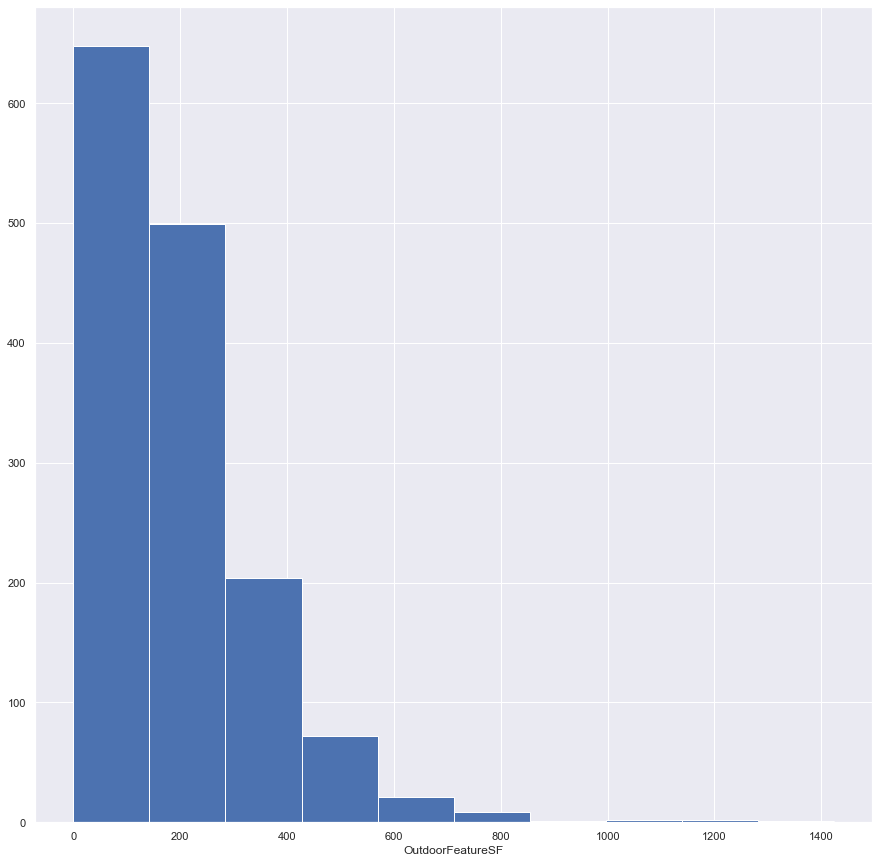

<Figure size 360x360 with 0 Axes>

In [1366]:
for feature in i:
    data=test.copy()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.figure(figsize=[5,5])
    plt.show()

In [1367]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,3,3,896,3,5,0,0,Attchd,49.0,1,1.0,730.0,2508.0,612.0,1.0,260
1462,81.0,14267,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,1,5,3,1329,4,6,0,0,Attchd,52.0,1,1.0,312.0,2970.0,923.0,1.5,429
1463,74.0,13830,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.0,3,PConc,4,1,6,4,1629,3,6,1,3,Attchd,13.0,3,2.0,482.0,3039.0,791.0,2.5,246
1464,78.0,9978,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,1,6,5,1604,4,7,1,4,Attchd,12.0,3,2.0,470.0,3000.0,602.0,2.5,396
1465,43.0,5005,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.0,4,PConc,4,1,5,5,1280,4,5,0,0,Attchd,18.0,2,2.0,506.0,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,1,4,1092,3,5,0,0,not present,27.0,0,0.0,0.0,1638.0,0.0,1.5,0
2916,21.0,1894,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,3,3,1092,3,6,0,0,CarPort,36.0,1,1.0,286.0,1924.0,252.0,1.5,24
2917,160.0,20000,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,5,5,1224,3,7,1,3,Detchd,46.0,1,2.0,576.0,3024.0,1224.0,2.0,474


In [1368]:
rf_data = df_copy.copy()
rf_data

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,3,3,896,3,5,0,0,Attchd,49.0,1,1.0,730.0,2508.0,612.0,1.0,260
1462,81.0,14267,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,1,5,3,1329,4,6,0,0,Attchd,52.0,1,1.0,312.0,2970.0,923.0,1.5,429
1463,74.0,13830,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.0,3,PConc,4,1,6,4,1629,3,6,1,3,Attchd,13.0,3,2.0,482.0,3039.0,791.0,2.5,246
1464,78.0,9978,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,1,6,5,1604,4,7,1,4,Attchd,12.0,3,2.0,470.0,3000.0,602.0,2.5,396
1465,43.0,5005,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.0,4,PConc,4,1,5,5,1280,4,5,0,0,Attchd,18.0,2,2.0,506.0,3066.0,263.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,1,4,1092,3,5,0,0,not present,27.0,0,0.0,0.0,1638.0,0.0,1.5,0
2916,21.0,1894,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,3,3,1092,3,6,0,0,CarPort,36.0,1,1.0,286.0,1924.0,252.0,1.5,24
2917,160.0,20000,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.0,3,CBlock,3,1,5,5,1224,3,7,1,3,Detchd,46.0,1,2.0,576.0,3024.0,1224.0,2.0,474


In [1369]:
rf_data.to_csv('rf_test.csv')

In [1370]:
x = [df_copy[feature].mean() for feature in i]
list(zip(i, x))

[('LotFrontage', 68.33447566826594),
 ('LotArea', 9819.161069225496),
 ('MasVnrArea', 100.70914127423828),
 ('GrLivArea', 1486.0459218642907),
 ('GarageArea', 472.77381768334476),
 ('TotalSF', 3004.897875257025),
 ('TotalFinishedBsmt', 491.72618231665524),
 ('OutdoorFeatureSF', 184.59081562714186)]

### Dummifying Categorical Variables

In [1371]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [1372]:
categorical_features

['LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType']

In [1373]:
temp = pd.get_dummies(df_copy, drop_first=True)

In [1374]:
#dummified version of the dataframe
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_not present,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_not present,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,49,49,0.0,3,3,1,3,3,896,3,5,0,0,49.0,1,1.0,730.0,2508.0,612.0,1.0,260,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1462,81.0,14267,6,52,52,108.0,3,3,1,5,3,1329,4,6,0,0,52.0,1,1.0,312.0,2970.0,923.0,1.5,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1463,74.0,13830,5,13,12,0.0,3,4,1,6,4,1629,3,6,1,3,13.0,3,2.0,482.0,3039.0,791.0,2.5,246,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1464,78.0,9978,6,12,12,20.0,3,3,1,6,5,1604,4,7,1,4,12.0,3,2.0,470.0,3000.0,602.0,2.5,396,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1465,43.0,5005,8,18,18,0.0,4,4,1,5,5,1280,4,5,0,0,18.0,2,2.0,506.0,3066.0,263.0,2.0,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,36,36,0.0,3,3,1,1,4,1092,3,5,0,0,27.0,0,0.0,0.0,1638.0,0.0,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2916,21.0,1894,4,36,36,0.0,3,3,1,3,3,1092,3,6,0,0,36.0,1,1.0,286.0,1924.0,252.0,1.5,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2917,160.0,20000,5,46,10,0.0,3,3,1,5,5,1224,3,7,1,3,46.0,1,2.0

### Dropping Irrelavent Neighborhoods

In [1375]:
#hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values().index)
#top_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[-3:].index)
#bottom_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[:3].index)

#keep_hoods = top_hoods + bottom_hoods
#drop_hoods = ['Neighborhood_'+h for h in hoods if h not in keep_hoods]

# drop_hoods=['Neighborhood_OldTown',
#  'Neighborhood_Edwards',
#  'Neighborhood_BrkSide',
#  'Neighborhood_Sawyer',
#  'Neighborhood_Blueste',
#  'Neighborhood_SWISU',
#  'Neighborhood_NAmes',
#  'Neighborhood_NPkVill',
#  'Neighborhood_Mitchel',
#  'Neighborhood_SawyerW',
#  'Neighborhood_Gilbert',
#  'Neighborhood_NWAmes',
#  'Neighborhood_Blmngtn',
#  'Neighborhood_CollgCr',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Veenker',
#  'Neighborhood_Somerst',
#  'Neighborhood_Timber']
# feat =[feature for feature in temp.columns if feature not in drop_hoods]
# temp = temp[feat]
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_not present,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_not present,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,49,49,0.0,3,3,1,3,3,896,3,5,0,0,49.0,1,1.0,730.0,2508.0,612.0,1.0,260,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1462,81.0,14267,6,52,52,108.0,3,3,1,5,3,1329,4,6,0,0,52.0,1,1.0,312.0,2970.0,923.0,1.5,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1463,74.0,13830,5,13,12,0.0,3,4,1,6,4,1629,3,6,1,3,13.0,3,2.0,482.0,3039.0,791.0,2.5,246,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1464,78.0,9978,6,12,12,20.0,3,3,1,6,5,1604,4,7,1,4,12.0,3,2.0,470.0,3000.0,602.0,2.5,396,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1465,43.0,5005,8,18,18,0.0,4,4,1,5,5,1280,4,5,0,0,18.0,2,2.0,506.0,3066.0,263.0,2.0,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,36,36,0.0,3,3,1,1,4,1092,3,5,0,0,27.0,0,0.0,0.0,1638.0,0.0,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2916,21.0,1894,4,36,36,0.0,3,3,1,3,3,1092,3,6,0,0,36.0,1,1.0,286.0,1924.0,252.0,1.5,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2917,160.0,20000,5,46,10,0.0,3,3,1,5,5,1224,3,7,1,3,46.0,1,2.0

In [1376]:
sum(temp.isna().sum())

0

In [1377]:
#drop_dums = ['LotShape_IR3',
 #'HouseStyle_2.5Unf',
 #'Exterior1st_AsphShn',
 #'Exterior1st_BrkComm',
 #'Exterior1st_CBlock',
 #'Exterior2nd_AsphShn',
 #'Exterior2nd_Brk Cmn',
 #'Exterior2nd_CBlock',
 #'Exterior2nd_ImStucc',
 #'Exterior2nd_Stone',
 #'Foundation_Stone',
 #'Foundation_Wood',
 #'GarageType_CarPort']

In [1379]:
#temp = temp.drop(drop_dums, axis=1)

In [1380]:
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_not present,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_not present,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,49,49,0.0,3,3,1,3,3,896,3,5,0,0,49.0,1,1.0,730.0,2508.0,612.0,1.0,260,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1462,81.0,14267,6,52,52,108.0,3,3,1,5,3,1329,4,6,0,0,52.0,1,1.0,312.0,2970.0,923.0,1.5,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1463,74.0,13830,5,13,12,0.0,3,4,1,6,4,1629,3,6,1,3,13.0,3,2.0,482.0,3039.0,791.0,2.5,246,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1464,78.0,9978,6,12,12,20.0,3,3,1,6,5,1604,4,7,1,4,12.0,3,2.0,470.0,3000.0,602.0,2.5,396,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1465,43.0,5005,8,18,18,0.0,4,4,1,5,5,1280,4,5,0,0,18.0,2,2.0,506.0,3066.0,263.0,2.0,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,36,36,0.0,3,3,1,1,4,1092,3,5,0,0,27.0,0,0.0,0.0,1638.0,0.0,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2916,21.0,1894,4,36,36,0.0,3,3,1,3,3,1092,3,6,0,0,36.0,1,1.0,286.0,1924.0,252.0,1.5,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2917,160.0,20000,5,46,10,0.0,3,3,1,5,5,1224,3,7,1,3,46.0,1,2.0

In [1381]:
temp.to_csv('to_test.csv')

### Lasso Model

In [796]:
X = temp.drop('SalePrice', axis=1)
y= temp['SalePrice']


KeyError: "['SalePrice'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [ ]:
#do grid search to deterimine alpha

from sklearn.linear_model import Lasso
alpha_norm = 10

lasso = Lasso(normalize = True, alpha = alpha_norm)
lasso.fit(Xtrain, ytrain)


In [ ]:
lasso.score(Xtest, ytest)



In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] == 0:
        print(i)

In [ ]:
temp.iloc[:,112]